<a href="https://colab.research.google.com/github/Aasthapaudel/Google-Data-Analysis/blob/main/Google_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Suppose you are working in  a data-driven job role , and you have to answer all these question
1) First, write a code whre by changung just the keyword , we can search for multiple things.
2)Top 15 countries where the keyword are searched the most, and also create visual representation of
3)A world map needs to be plotted showing the coluntries that search the keyword most
4)we need to extract the time-wise interest of the keyword -how it trended in different years
### 5) Compare related keyword and plot the graph


In [ ]:
pip install pytrends matplotlib pandas seaborn plotly


  Using cached pytrends-4.9.2-py3-none-any.whl.metadata (13 kB)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

### setup pytrend library and keyword define

In [8]:
pytrends = TrendReq(hl = 'en-US',tz = 360)
keyword ='cloud computing'

# Data Request

In [9]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',
                    geo='',gprop ='')

# country wise interest

In [11]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by= keyword ,ascending =False).head(15)
print(region_data)

              cloud computing
geoName                      
Nepal                     100
India                      77
St. Helena                 74
Zimbabwe                   71
Ethiopia                   65
Ghana                      58
Sri Lanka                  52
Kenya                      52
Cameroon                   51
Nigeria                    43
Uganda                     36
Pakistan                   34
Singapore                  30
South Korea                28
South Africa               27


In [12]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-20-2323839660.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




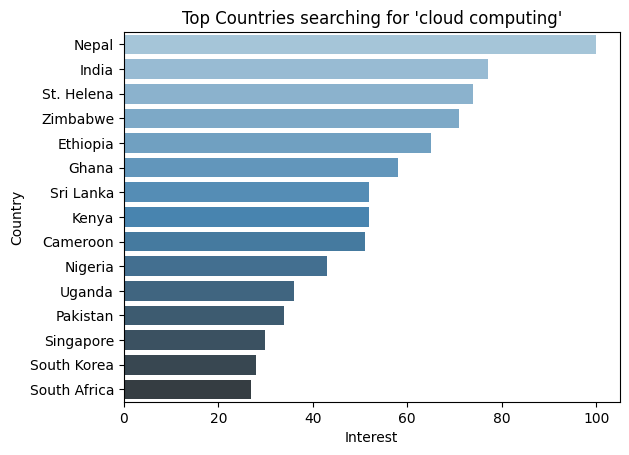

In [20]:
sns.barplot(x= region_data[keyword], y=region_data.index, palette="Blues_d")
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# world map

In [30]:
region_data = region_data.set_index('index')


In [31]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                     locations='geoName',
                     locationmode='country names',
                     color =keyword,
                     title=f"Search Interest for '{keyword}' by Country",
                     color_continuous_scale="Blues")


In [32]:
fig.show()


# time wise interest

In [33]:
time_df =pytrends.interest_over_time()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



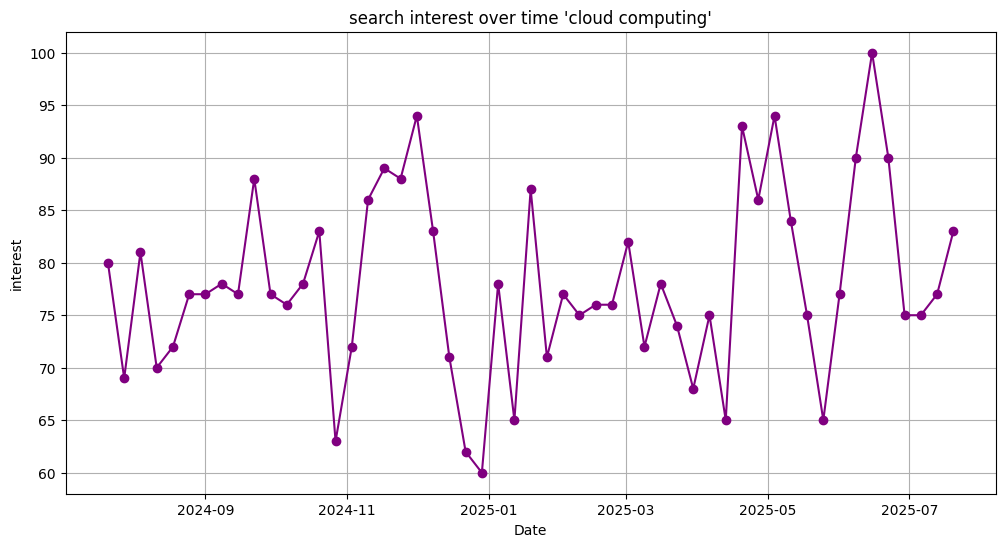

In [37]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("interest")
plt.grid(True)
plt.show

## multiple keywords compare

In [38]:
kw_list =["cloud computing","data science","machine learning"]
pytrends.build_payload(kw_list ,cat=0 ,timeframe ='today 12-m',geo='',gprop='')

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



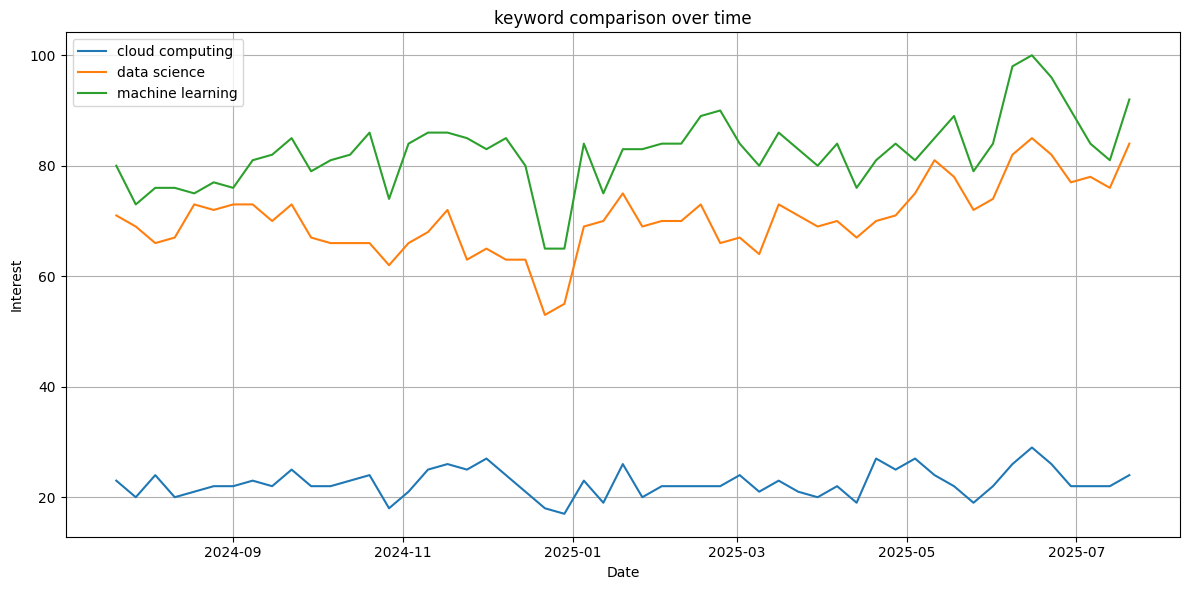

In [41]:
compare_df =pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
  plt.plot(compare_df.index,compare_df[kw],label=kw)
  plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-40-1932621082.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



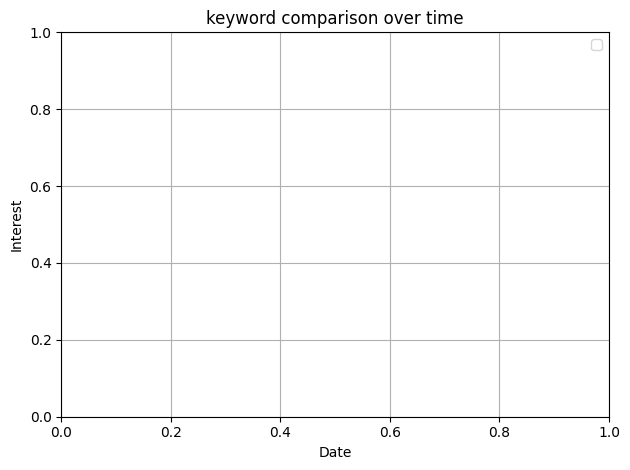

In [40]:
plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()